In [1]:
import torch, torchvision
import matplotlib.pyplot as plt
import kornia
import tqdm
import numpy as np
import einops
import timm
from PIL import Image





In [2]:
!pip install --upgrade jedi==0.17.2

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: jedi==0.17.2 in /home/ayb/.local/lib/python3.8/site-packages (0.17.2)


In [3]:
import torch_dct

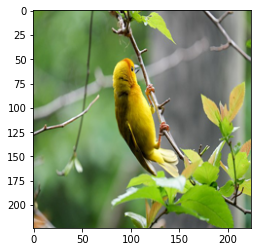

Mag range:0.019105326384305954 -- 27413.193359375
LogMag range:0.0018519856967031956 -- 1.0


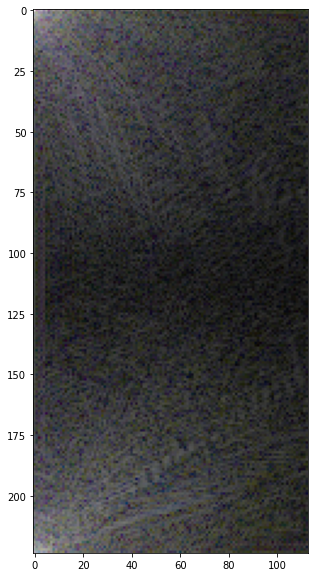

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


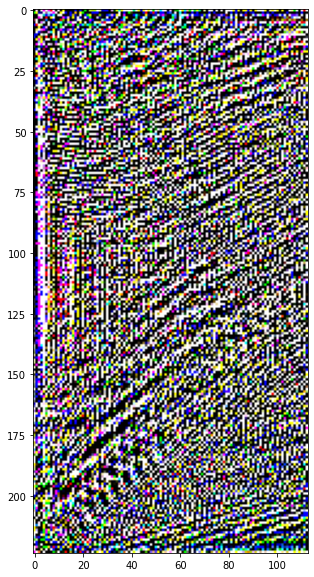

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


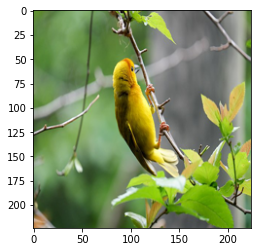

In [8]:


from kornia import tensor_to_image as t2i

input_img_1 = torchvision.transforms.functional.to_tensor(
    Image.open('./input_img.jpeg').resize([224, 224])
)

input_img_2 = torchvision.transforms.functional.to_tensor(
    Image.open('./input_img.jpeg').resize([224, 224])
)

input_imgs = [input_img_1, input_img_2]



plt.imshow(t2i(input_img)); plt.show()


input_img_fft = torch.fft.rfft2(input_img)


mag, angle = input_img_fft.abs(), input_img_fft.angle()


print(f"Mag range:{mag.min().item()} -- {mag.max().item()}")

log_mag = torch.log(mag+1)
log_mag /= log_mag.max()

print(f"LogMag range:{log_mag.min().item()} -- {log_mag.max().item()}")


plt.figure(figsize=[10, 10]);plt.imshow(t2i(log_mag)); plt.show()
plt.figure(figsize=[10, 10]);plt.imshow(t2i(angle)); plt.show()


reconstruction =  torch.fft.irfft2(input_img_fft)

plt.imshow(t2i(abs(reconstruction)))


TypeError: fft_rfft() got an unexpected keyword argument 'onesided'

In [ ]:
input_img_fft.shape


In [ ]:
first = log_mag[:, :112, :]
second = log_mag[:, 112:, :]

In [ ]:
first.shape
plt.imshow(t2i(first)); plt.show()

plt.imshow(t2i()); plt.show()

In [ ]:
second.shape